In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/house predictions/train.csv')
test=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/house predictions/test.csv')
submission=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/house predictions/sample_submission.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
train.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)

<Axes: >

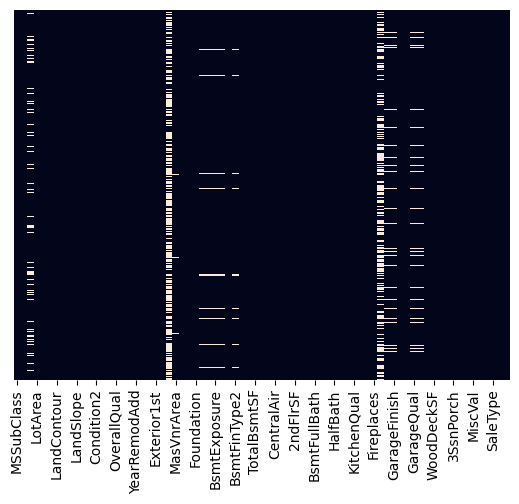

In [18]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [19]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

<Axes: >

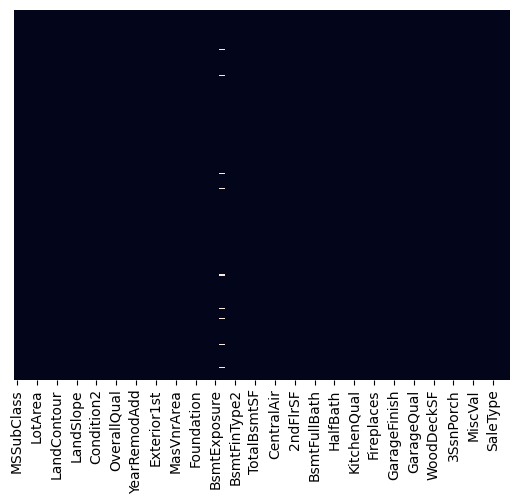

In [20]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [10]:
train.dropna(inplace=True)

<Axes: >

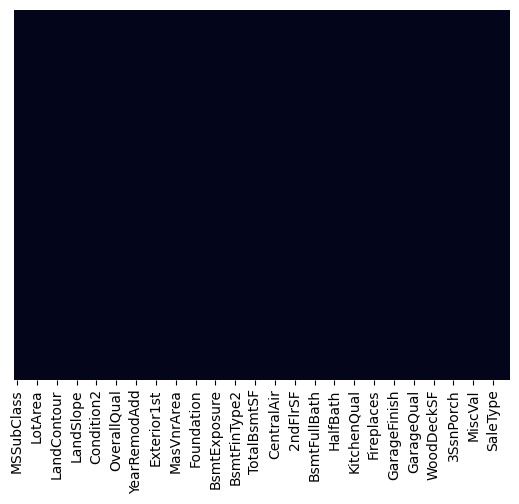

In [11]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [12]:
len(test)

1459

In [22]:
final=pd.concat([train, test], axis=0)

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2881 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2881 non-null   int64  
 1   MSZoning       2877 non-null   object 
 2   LotFrontage    2654 non-null   float64
 3   LotArea        2881 non-null   int64  
 4   Street         2881 non-null   object 
 5   LotShape       2881 non-null   object 
 6   LandContour    2881 non-null   object 
 7   Utilities      2879 non-null   object 
 8   LotConfig      2881 non-null   object 
 9   LandSlope      2881 non-null   object 
 10  Neighborhood   2881 non-null   object 
 11  Condition1     2881 non-null   object 
 12  Condition2     2881 non-null   object 
 13  BldgType       2881 non-null   object 
 14  HouseStyle     2881 non-null   object 
 15  OverallQual    2881 non-null   int64  
 16  OverallCond    2881 non-null   int64  
 17  YearBuilt      2881 non-null   int64  
 18  YearRemodAdd 

In [16]:
final.isnull().sum()

MSSubClass        0
MSZoning          4
LotFrontage     227
LotArea           0
Street            0
               ... 
Alley          2774
GarageYrBlt    1500
PoolQC         2878
Fence          2591
MiscFeature    2830
Length: 81, dtype: int64

In [17]:
final.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Id,GarageYrBlt
count,2881.000000,2654.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2866.000000,2880.000000,2880.000000,...,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,1422.000000,1459.000000,1381.000000
mean,57.080875,69.419608,10179.467893,6.112461,5.572024,1971.490108,1984.474141,102.806001,447.247569,50.236458,...,23.138494,2.574106,16.274210,2.281499,49.691427,6.214162,2007.789309,182889.092124,2190.000000,1977.721217
std,42.496120,22.323966,7929.520911,1.399350,1.111697,30.379738,20.810407,179.761603,455.757908,170.222083,...,64.314488,25.135635,56.523309,35.897514,567.010622,2.720221,1.314068,79414.407095,421.321334,26.431175
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1461.000000,1895.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,131625.000000,1825.500000,1959.000000
50%,50.000000,70.000000,9468.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000,2190.000000,1979.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2001.000000,2004.000000,165.750000,737.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000,2554.500000,2002.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,2919.000000,2207.000000


In [23]:
final.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt','Id'],axis=1,inplace=True)

In [20]:
final.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [24]:
final['BsmtFinSF1']=final['BsmtFinSF1'].fillna(final['BsmtFinSF1'].mean())
final['BsmtFinSF2']=final['BsmtFinSF2'].fillna(final['BsmtFinSF2'].mean())
final['BsmtFinType1']=final['BsmtFinType1'].fillna(final['BsmtFinType1'].mode()[0])
final['BsmtUnfSF']=final['BsmtUnfSF'].fillna(final['BsmtUnfSF'].mean())
final['TotalBsmtSF']=final['TotalBsmtSF'].fillna(final['TotalBsmtSF'].mean())

In [25]:
final.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

<Axes: >

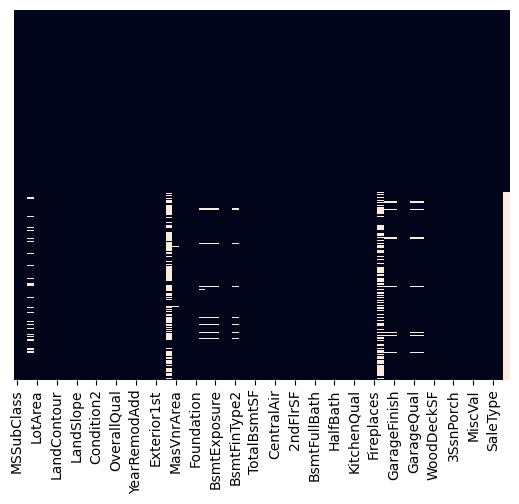

In [23]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False)

In [26]:
final.to_csv('testfinal4.csv', index=False)

In [30]:
import pandas as pd
final_train_test = pd.get_dummies(final,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',                                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                                       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',                                        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                                       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']).dtypes

print(final_train_test.dtypes)                         

object


In [29]:
final_train_test.shape

(274,)

In [27]:
final_train_test = final_train_test.loc[:,~final_train_test.columns.duplicated()]

In [28]:


final_train_test.shape



(2881, 273)

In [29]:
final_train_test.to_csv('testfinaltraintest.csv', index=False)

In [33]:
final_train_test.isnull().any()

MSSubClass               False
LotFrontage               True
LotArea                  False
OverallQual              False
OverallCond              False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 273, dtype: bool

In [34]:
final_train_test.dropna()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:


m_train=final_train_test.iloc[:1422,:]
m_test=final_train_test.iloc[1422:,:]